# Statistics Block 2: Exercises
## Error propagation and confidence interval
1. Consider $N$ measurements $(x_i,y_i)$ where the $y_i$ are independent and all have the same error $\sigma$. Assuming linear dependence is expected, the parameters af the lne $y=a_1+a_2x$ that fit the data the best are obtained by minimizing the sum $\chi^2=\sum[y_i-(a_1+a_2x_i)^2]$, which leads to the simple minimum squares equations:
\begin{eqnarray}
a_1 & = &(\sum x_i^2\sum y_i-\sum x_i\sum x_i y_i)/\Delta \\
a_2 & = & (N\sum x_i y_i-\sum x_i\sum y_i)/\Delta
\end{eqnarray}
with $\Delta=N\sum x_i^2-(\sum x_i)^2$

Find the parameters and errors of the line that best fit the data below, with $\sigma=0.3$. Plot the data and fit for $0\leq x \leq 5$

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import scipy.optimize as opt

x = np.arange(2, 3.1, 0.1)
y = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
sigma = 0.3

In [2]:
N = len(x)
S_x = sum(x)
S_y = sum(y)
S_xy = sum(x*y)
S_x2 = sum(np.square(x))
S2_x = np.square(sum(x))
Delta = N*S_x2 - S2_x
CovA = sigma**2/Delta*np.array([[S_x2, -S_x],[-S_x, N]])
a1 = (S_x2*S_y - S_x*S_xy)/Delta
a2 = (N*S_xy - S_x*S_y)/Delta

In [3]:
x_grid = np.arange(2, 3.01, .01)
lin_y = a1+a2*x_grid
# Theoretical value?????
y_errors = 0

<Container object of 3 artists>

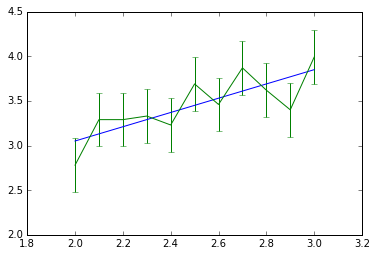

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x_grid, lin_y)
ax.errorbar(x, y, np.ones(len(x))*sigma)

In [5]:
m = 10000
y_prime = np.random.normal(a1+a2*x, sigma, (m,len(x)))
S_yp = np.sum(y_prime, axis=1)
S_xyp = np.sum(x*y_prime, axis=1)
a1_vec = (S_x2*S_yp - S_x*S_xyp)/Delta
a2_vec = (N*S_xyp - S_x*S_yp)/Delta
y_05 = a1_vec+a2_vec*0.5
mu_05 = np.mean(y_05)
sigma_05 = np.std(y_05)
print 'The estimatied value of y(0.5) has mean = %f and std = %f' %(mu_05, sigma_05)

The estimatied value of y(0.5) has mean = 1.864561 and std = 0.574596


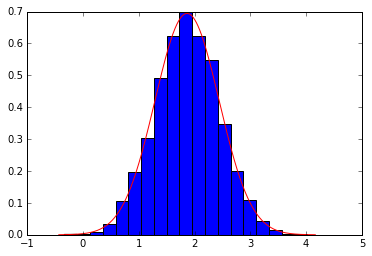

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y_05, bins=20, normed = 1)
dist = stat.norm(mu_05, sigma_05)
x_pdf = np.linspace(mu_05-4.*sigma_05, mu_05+4*sigma_05, 1000)
ax.plot(x_pdf, dist.pdf(x_pdf),'r')

## Maximum likelihood and least squares
#### 1. Find the maximum likelihood estimators for the mean and the variance of a Gaussian distribution, and obtain the covariance matrix from the second derivatives of the likelihood

$$
L(\vec{x};\mu,\sigma)=\prod_{i=1}^N f(x_i;\mu,\sigma)
$$
Thus, the log-likelihood is:
$$
l(\vec{x};\mu,\sigma)=-2\log L(\vec{x};\mu,\sigma)= n\log (2\pi) +n\log (\sigma^2) + \frac{1}{\sigma^2}\sum_{i=1}^n (x_i-\mu)^2
$$
Therefore, the ML estimator of $\mu$ and $\sigma$ will be the values that minimize $l(\vec{x};\mu,\sigma)$ derivatives with respect to $\mu$ and $\sigma$ respectively:
$$
\frac{\partial l(\vec{x};\mu,\sigma)}{\partial \mu}\Big\rvert_{\mu=\mu_{ML}}=0=\frac{1}{\sigma^2}\sum_{i=1}^n 2(x_i-\mu_{ML})(-1) \quad \rightarrow \quad 0=\sum_{i=1}^n (x_i-\mu_{ML})=\sum_{i=1}^n (x_i)-n\mu_{ML} \\
\Rightarrow \mu_{ML}=\frac{1}{n}\sum_{i=1}^n x_i \\
\frac{\partial l(\vec{x};\mu,\sigma)}{\partial \sigma}\Big\rvert_{\sigma=\sigma_{ML}}=0=n\frac{2}{\sigma_{ML}}+\frac{-2}{\sigma_{ML}^3}\sum_{i=1}^n (x_i-\mu)^2 \quad \rightarrow \quad \frac{n}{\sigma_{ML}}=\frac{1}{\sigma_{ML}^3}\sum_{i=1}^n (x_i-\mu)^2 \\
\Rightarrow \sigma_{ML}^2 = \frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2
$$

#### 3. Generate 2000 random numbers, $\{y_i\}$, following $f(x)=1+a_1x+a_2x^2$, using $a_1=0.5$,  $a_2=0.5$, for $-1\leq x \leq 1$. Use these data to perform a likelihood fit to estimate $a_1$,$a_2$. Draw the associated contour plots together with the real value of the estimate.

$$
f(x)=1+a_1x+a_2x^2 \\ \rightarrow \quad F(x)=\int_{-1}^x f(x) dx = x+\frac{a_1}{2}x^2+\frac{a_2}{3}x^3-(-1+\frac{a_1}{2}-\frac{a_2}{3})=(x+1)+\frac{a_1}{2}(x^2-1)+\frac{a_2}{3}(x^3+1)=\\ =(x+1)+\frac{a_1}{2}(x-1)(x+1)+\frac{a_2}{3}(x+1)(x^2-x+1)
$$
Note that $F(1)=2+\frac{2}{3}a_2$ instead of $1$ which is what it should be due to $x\in [-1,1]$. Therefore, the pdf is not normalized. To solve this, we normalize both the pdf and the cdf dividing by the factor $2+\frac{2}{3}a_2$.

##### Likelihod fit
$$
L(\vec{x};a_1,a_2)=\prod_{i=1}^N f(x_i;a_1,a_2)=\prod_{i=1}^N \frac{1+a_1x_i+a_2x_i^2}{2+\frac{2}{3}a_2}
$$
Thus, the log-likelihood is:
$$
l(\vec{x};a_1,a_2)=-2\log L(\vec{x};a_1,a_2)=-2\sum_{i=1}^n \log (f(x_i;a_1,a_2))=2\sum_{i=1}^n (2+\frac{2}{3}a_2)-2\sum_{i=1}^n \log(1+a_1x_i+a_2x_i^2)= \\
4n(1+\frac{1}{3}a_2)-2\sum_{i=1}^n \log(1+a_1x_i+a_2x_i^2)
$$

Therefore, we derivate to find the ML estimators as they have to minimize $l(\vec{x};a_1,a_2)$:
$$
\frac{\partial l(\vec{x};a_1,a_2)}{\partial a_1}\Big\rvert_{a_1=a_1^{ML}}=0=-2\sum_{i=1}^n \frac{x_i}{1+a_1^{ML}x_i+a_2^{ML}x_i^2}
$$
$$
\frac{\partial l(\vec{x};a_1,a_2)}{\partial a_2}\Big\rvert_{a_2=a_2^{ML}}=0=\frac{4}{3}n-2\sum_{i=1}^n \frac{x_i^2}{1+a_1^{ML}x_i+a_2^{ML}x_i^2}
$$
These equations are transcendental equations, but can easily be solved numerically in python using `scipy.optimize.fsolve`

In [39]:
def pdf_3(x,a1,a2):
    y = (1+a1*x+a2*np.square(x))/(2.+2./3.*a2)
    return y

def cdf_3(x,a1,a2):
    P = (x+1)*(1+a1/2.*(x-1)+a2/3.*(x**2-x+1))/(2.+2./3.*a2)
    return P

def try_reject(fun,N,a,b,fmax,m,*fun_args):
    x=a+(b-a)*np.random.random(m*N)
    y=fmax*np.random.random(m*N)
    Xi=x[y<=fun(x,*fun_args)][:N]
    return Xi

In [40]:
def likelihood(sample,a1,a2):
    L = -2.*np.sum(np.log(pdf_3(sample,a1,a2)))
    return L

In [41]:
def d_likelihood(a,sample):
    a1=a[0]; a2=a[1]
    den=pdf_3(sample,a1,a2)
    d1=-2.*sum(sample/den)
    d2=4./3.*len(sample)-2.*sum(np.square(sample)/den)
    d=np.array([d1,d2])
    return d

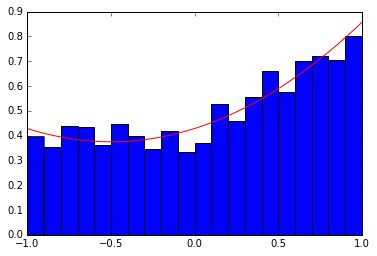

In [93]:
N = 2000
a1 = .5
a2 = .5
sample = try_reject(pdf_3,N,-1,1,.9,2,a1,a2)
plt.hist(sample,normed=1,bins=20)
x = np.linspace(-1,1,200)
plt.plot(x,pdf_3(x,a1,a2),'r')

In [94]:
n_grid = 51
a_mesh = np.linspace(0,1,n_grid)
a1_grid, a2_grid = np.meshgrid(a_mesh, a_mesh)
L = np.empty((n_grid,n_grid))
for i in xrange(n_grid):
    for j in xrange(n_grid):
        L[j,i]=likelihood(sample,a1_grid[j,i],a2_grid[j,i])

In [95]:
# Estimate using the minimum value in the matrix L used to draw the contour plots
L_min = L.min()
ij_min = np.where(L == L_min)
ij_min = tuple([i.item() for i in ij_min])
a1_estimated = a1_grid[ij_min]
a2_estimated = a2_grid[ij_min]
print 'Rough estimate:',a1_estimated,a2_estimated
# Estimate a1 and a2 using the derivatives of l, finding its roots numerically
a1_num,a2_num = opt.fsolve(d_likelihood,np.array([.5,.5]),args=(sample))
# Calculate the variances of a1 and a2 using the -log(L(mu+sigma))=-log(L(mu))+1
# which implies that l(mu+sigma)-l(mu)-1=0. Thus, finding the root of this equation 
# (implemented in a1_var and a2_var functions) will be an estimate of the standard deviation
Lmax = likelihood(sample,a1_num,a2_num)
a1_error = np.empty((2,1)) ; a2_error = np.empty((2,1))
a1_var = lambda a1 : likelihood(sample,a1,a2_num)-Lmax-1
a1_error[1] = opt.fsolve(a1_var,a1_num+.1)[0]-a1_num # + error
a1_error[0] = a1_num-opt.fsolve(a1_var,a1_num-.1)[0] # - error
a2_var = lambda a2 : likelihood(sample,a1_num,a2)-Lmax-1
a2_error[1] = opt.fsolve(a2_var,a2_num+.1)[0]-a2_num # + error
a2_error[0] = a2_num-opt.fsolve(a2_var,a2_num-.1)[0] # - error
print 'Propper ML estimate:\n\ta1=%.2g (-%.2g,+%.2g)\n\ta2=%.2g (-%.2g,+%.2g)' %(a1_num,a1_error[0],a1_error[1],
                                                                  a2_num,a2_error[0],a2_error[1])

Rough estimate: 0.48 0.48
Propper ML estimate:
	a1=0.48 (-0.045,+0.045)
	a2=0.47 (-0.09,+0.097)


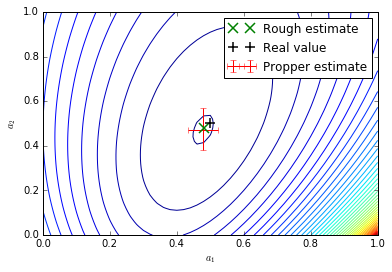

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(a1_grid,a2_grid,L,50)
ax.plot(a1_estimated,a2_estimated,'gx',markersize=10,mew=1.5,label='Rough estimate')
ax.errorbar(a1_num,a2_num,xerr=a1_error,yerr=a2_error,color='r',label='Propper estimate')
ax.plot(a1,a2,'k+',markersize=10,mew=1.5,label='Real value')
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.legend()

Now me will repeat this calculation with montecarlo $m$ times in order to estimate using another method the variance of $a_1^{ML}$ and $a_2^{ML}$